In [20]:

!pip install seaborn pandas
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 2.4 MB/s eta 0:00:002.2 MB/s eta 0:00:01


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [21]:
df=pd.read_json('processed_data_NousResearch_Nous_Hermes_2_Mistral_7B_DPO_3.json')

In [22]:

all_scores = {}
key_mapping={0:'relevance',1:'consistency',2:'fluency',3:'coherence'}
for key in key_mapping.values():
    corr = df.loc[:,[c for c in df.columns if key in c ]].corr()
    scores = corr[key].drop(key)
    scores.index = [i.replace(key,'') for i in scores.index]
    all_scores[key] = scores

In [28]:
df2

,relevance,consistency,fluency,coherence
chatgpt_,0.459121,0.514608,0.384670,0.438264
argmax_inorder_,0.317680,0.377829,0.097395,0.159791
e(s)_10_inorder_,0.444014,0.504288,0.119101,0.244443
e(s)_1_inorder_,0.386314,0.449185,0.161614,0.224999
argmax_reverse_,0.357022,0.332033,NaN,NaN
e(s)_10_reverse_,0.420140,0.419697,0.000807,0.060485
e(s)_1_reverse_,0.429193,0.390917,0.123526,0.133292
argmax_random_,0.092175,0.169485,0.000262,0.039679
e(s)_10_random_,0.194946,0.299291,0.014967,0.060673
e(s)_1_random_,0.152094,0.241069,0.010171,0.063964


<AxesSubplot:>

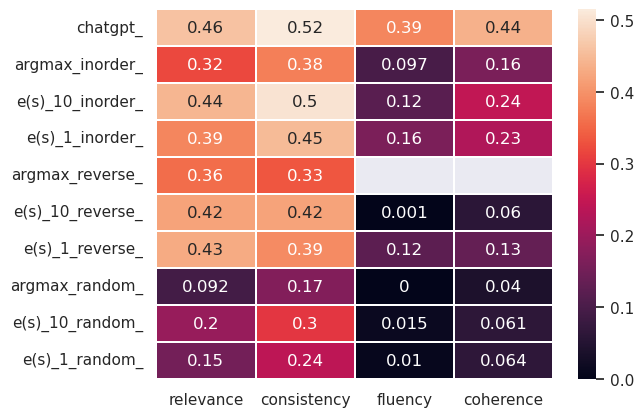

In [35]:

df2=pd.DataFrame(all_scores)
df2.round(3)


sns.heatmap(df2.round(3),annot=True,linewidths=0.1)

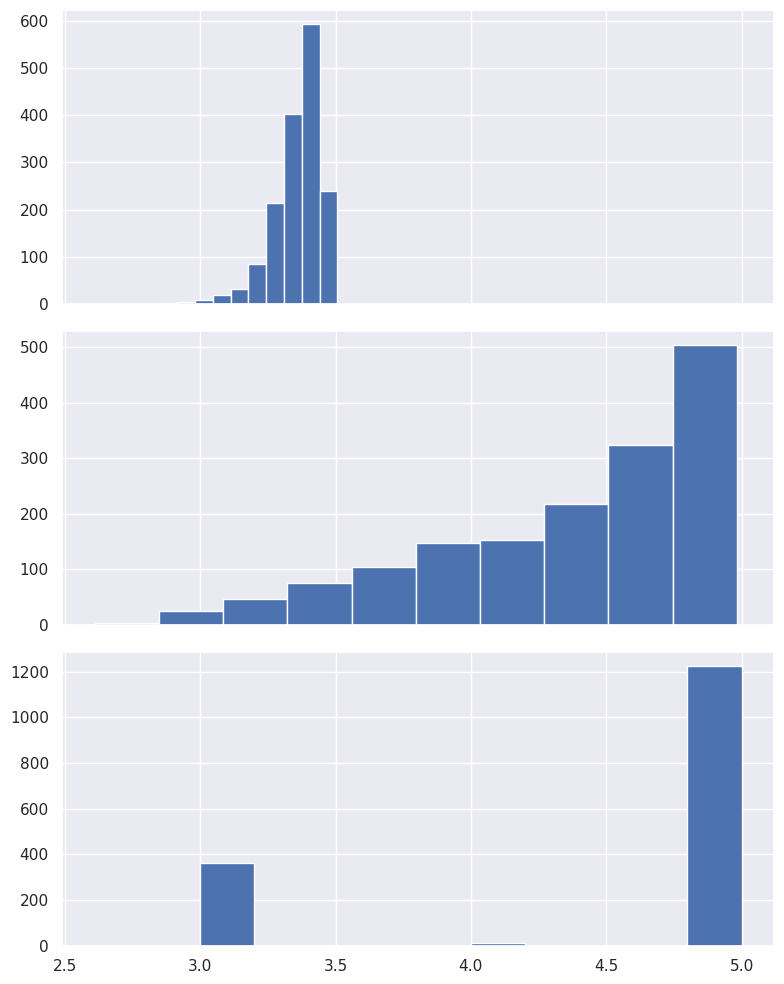

In [36]:

fig,ax = plt.subplots(3,1,figsize=(8,10), sharex=True)
df['e(s)_10_inorder_relevance'].hist(ax=ax[0])
df['e(s)_1_inorder_relevance'].hist(ax=ax[1])
df['argmax_inorder_relevance'].hist(ax=ax[2])
fig.tight_layout()